# **Exploratory Data Analysis**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read CSV file
df = pd.read_csv('../data/processed/cleaned_online_retail.csv')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522480 entries, 0 to 522479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    522480 non-null  int64  
 1   StockCode    522480 non-null  object 
 2   Description  522480 non-null  object 
 3   Quantity     522480 non-null  int64  
 4   InvoiceDate  522480 non-null  object 
 5   UnitPrice    522480 non-null  float64
 6   CustomerID   391093 non-null  float64
 7   Country      522480 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.9+ MB


In [4]:
# Change InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
# Make CsstomerID as an object
df['CustomerID'] = df['CustomerID'].astype(str).str.replace('.0', '', regex=False)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522480 entries, 0 to 522479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    522480 non-null  int64         
 1   StockCode    522480 non-null  object        
 2   Description  522480 non-null  object        
 3   Quantity     522480 non-null  int64         
 4   InvoiceDate  522480 non-null  datetime64[ns]
 5   UnitPrice    522480 non-null  float64       
 6   CustomerID   522480 non-null  object        
 7   Country      522480 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 31.9+ MB


##### **Checking Outlier : UnitPrice**

In [7]:
# Generate summary statistics for the 'UnitPrice' column
df['UnitPrice'].describe()

count    522480.000000
mean          3.273892
std           4.393241
min           0.040000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: UnitPrice, dtype: float64

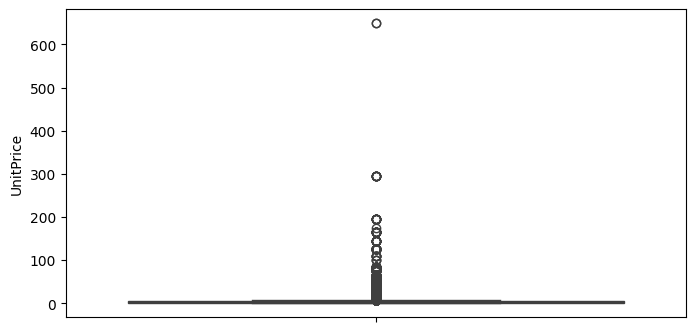

In [9]:
#Checking for OutLiers : UnitPrice using boxplot
plt.figure(figsize=(8,4))
sns.boxplot(y = df['UnitPrice'])
plt.show()

In [9]:
df.loc[df['UnitPrice'] >= 600].value_counts()
       

InvoiceNo  StockCode  Description                     Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
556444     22502      PICNIC BASKET WICKER 60 PIECES  60        2011-06-10 15:28:00  649.5      15098       United Kingdom    1
556446     22502      PICNIC BASKET WICKER 60 PIECES  1         2011-06-10 15:33:00  649.5      15098       United Kingdom    1
Name: count, dtype: int64

The boxplot highlights **UnitPrice ≥ 600** as statistical outliers, but further investigation confirms they are **valid transactions**. The product *"PICNIC BASKET WICKER 60 PIECES"* (StockCode: 22502) appears twice with a **consistent price of 649.5**, indicating it is not a data entry error. The time difference between transactions (5 minutes) supports that these were legitimate sales. Since these are valid data points, no modifications are needed. However, their impact on summary statistics should be considered when analyzing pricing patterns.


##### **Checking Outlier : Quantity**

In [13]:
# Generate summary statistics for the 'Quantity' column
df['Quantity'].describe()

count    522480.000000
mean         10.643267
std         156.603097
min           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
# lower_percentile = df['UnitPrice'].quantile(0.05)  # 5% terbawah
# upper_percentile = df['UnitPrice'].quantile(0.95)  # 5% teratas

# df_trimmed = df[(df['UnitPrice'] >= lower_percentile) & (df['UnitPrice'] <= upper_percentile)]


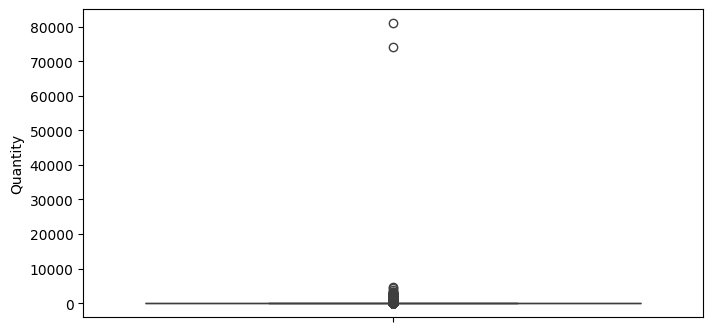

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(y = df['Quantity'])
plt.show()

In [15]:
df[df['Quantity']>= 70000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
59407,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
521013,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [16]:
df = df[df['Quantity']< 70000]

The boxplot highlights **Quantity ≥ 70,000** as extreme values. Upon inspection, two transactions exceed this threshold:  
- **74215 units** of *"MEDIUM CERAMIC TOP STORAGE JAR"*,  
- **80995 units** of *"PAPER CRAFT, LITTLE BIRDIE"*.  

These values likely represent bulk purchases that significantly skew the distribution. To ensure meaningful analysis, these two records will be removed from the dataset, allowing for a more representative understanding of typical order quantities.


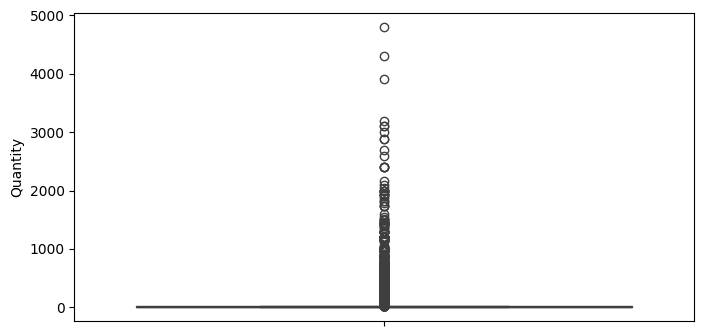

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(y = df['Quantity'])
plt.show()

In [16]:
df[df['Quantity']> 4000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
59407,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
198423,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom
406236,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom
521013,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


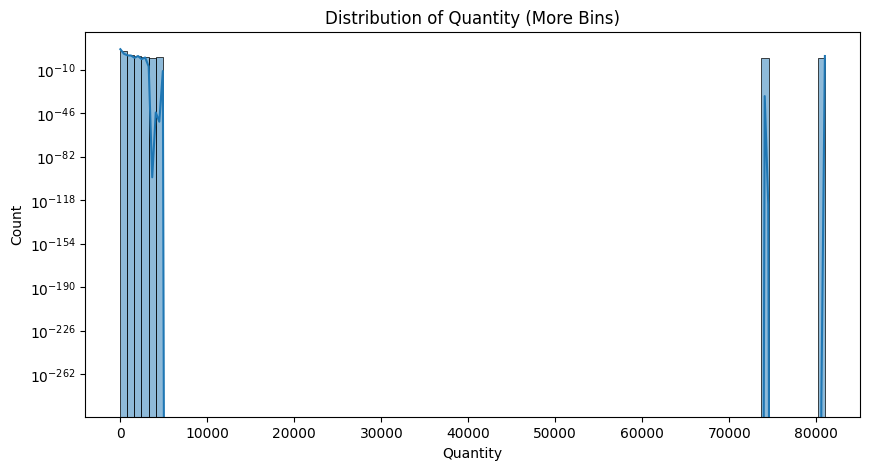

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 5))

# Histogram normal dengan bins lebih banyak
sns.histplot(df['Quantity'], bins=100, kde=True)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.yscale("log")  # Gunakan skala log untuk melihat distribusi lebih jelas
plt.show()


In [19]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
print(f"Jumlah Outlier: {len(outliers)}")


Jumlah Outlier: 26815
